In [ ]:

import os
import cv2
import selectivesearch
import sys

sys.path.append("..")  # Go up one level, adjust as necessary

from module.utils import  parse_xml, prepare_proposals,get_proposals, calculate_iou, load_image, get_id,calc_recall, calc_abo
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np
#import torch 
from torch.utils.data import Dataset

img_path = "../Potholes/annotated-images/"
anno_path = "../Potholes/annotated-images/"
# This does not scale. We should save annotation proposals in a file. 

image_count = 10

files = os.listdir(img_path)


image_paths = np.array(list(filter(lambda file: file.endswith(".jpg"), files)))
label_paths = np.array(list(filter(lambda file: file.endswith(".xml"), files)))


boxes = [parse_xml(anno_path + label_path) for label_path in label_paths[:image_count]]
images = [load_image(img_path + img) for img in image_paths[:image_count]]

IMAGE_WIDTH = 800
IMAGE_HEIGHT = 800

IMAGE_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)


In [10]:
proposal_boxes, labels = prepare_proposals(
    img_path,
    anno_path,
    5000, 
    0.5,
    scale=25,
    sigma=1.2,
    min_size=300,
    image_shape=IMAGE_SIZE,
    count=image_count)

In [11]:
def visualize_image(image, boxes,labels, proposals=None, scale_x=1.0, scale_y=1.0):
    # Adjust ground truth boxes according to the scale
    
    # Convert color for display
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Draw ground truth boxes in blue
    for (xmin, ymin, xmax, ymax) in boxes:
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    
    # Draw Selective Search proposals in green if provided
    if proposals is not None:
        for (x, y, w, h), label in zip(proposals,labels):
            # Adjust Selective Search boxes according to the scale
            x = x * scale_x
            y = y * scale_y
            w = w * scale_x
            h = h * scale_y

            x, y, w, h = int(x), int(y), int(w), int(h)
            if label == 1:
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            else:
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 1)
                
            # cv2.putText(image, (15, 15), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

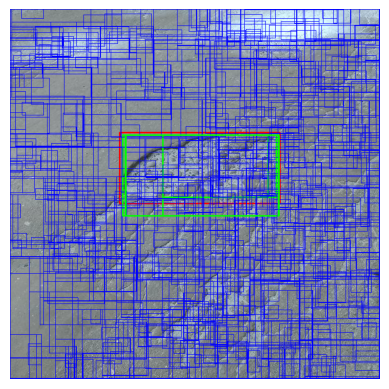

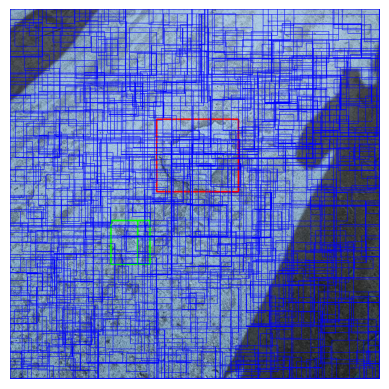

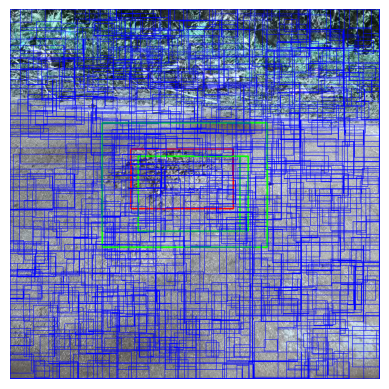

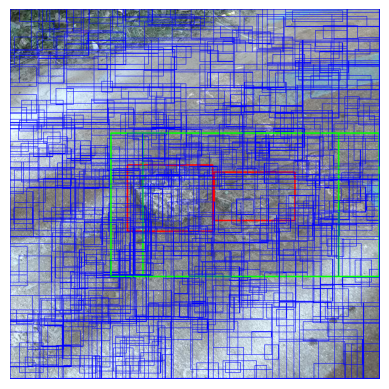

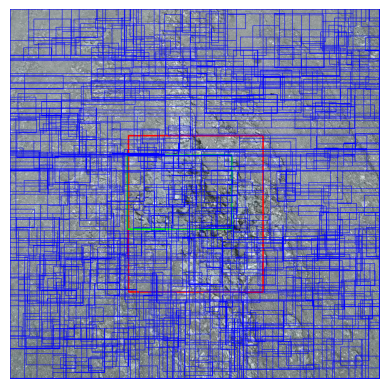

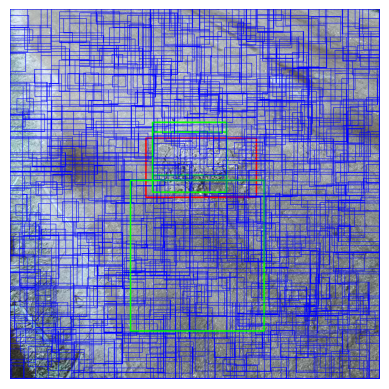

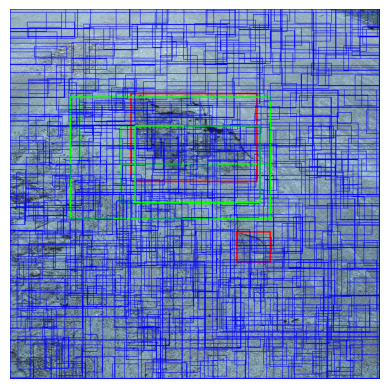

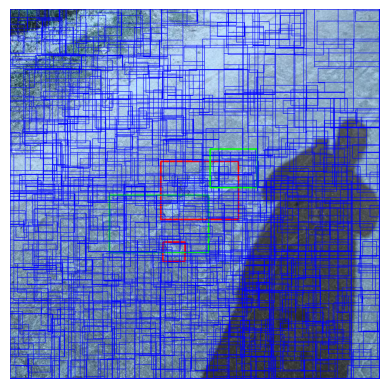

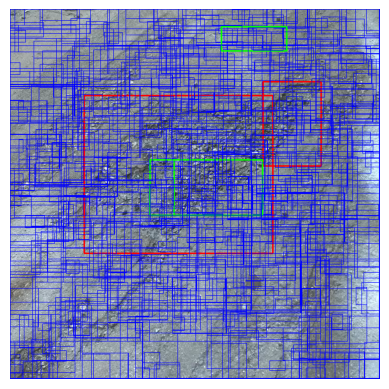

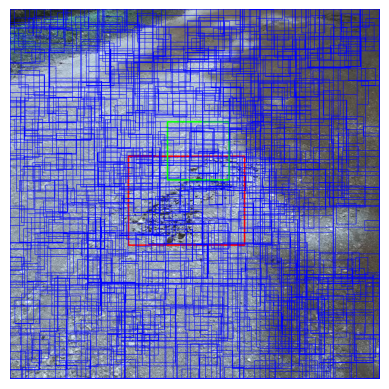

In [12]:

for i in range(image_count):
    # Calculate scale_x and scale_y
    scale_x = images[i].shape[0] / IMAGE_WIDTH
    scale_y = images[i].shape[1] / IMAGE_HEIGHT 


    visualize_image(images[i], boxes[i], labels[i], proposal_boxes[i], scale_x=scale_x, scale_y=scale_y)